core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
c:\Users\dilau\Desktop\Develope-ghit\virtuale\.venv\Lib\si

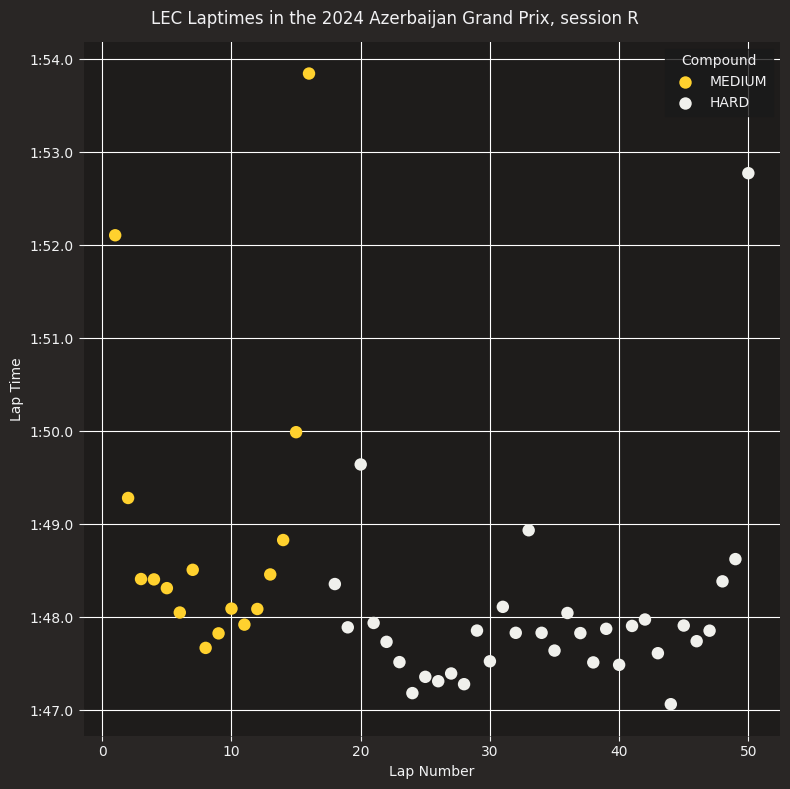

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

year = 2024
gran_prix = "Azerbaijan"
session = 'R'

driver = "LEC" #3 letter driver

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')
#Load the race session.

race = fastf1.get_session(year, gran_prix, session)
race.load()
#Get all the laps for a single driver. Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()

#Make the scattterplot using lap number as x-axis and lap time as y-axis. Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=race),
                s=80,
                linewidth=0,
                legend='auto')

# Make the plot more aesthetic.

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{driver} Laptimes in the {year} {gran_prix} Grand Prix, session {session}")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()